In [ ]:
# import zipfile
# zip_path = "/content/drive/MyDrive/covid19_prediction /covid19_prediction.zip"  # Replace with the actual path to your zip file
# extract_path = "/content/drive/MyDrive/covid19_prediction "  # Replace with the desired path for the extracted files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Data Augmentation**

In [2]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

In [4]:
# data augmentation for the testing variable

test_datagen = ImageDataGenerator(rescale =1./255)

In [5]:
# data augmentation on the training data


x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/covid19_prediction /Data/train',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)


Found 5144 images belonging to 3 classes.


In [6]:
# data augmentation on the testing data


x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/covid19_prediction /Data/train',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 5144 images belonging to 3 classes.


##**CNN Model building**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [8]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(3,activation ='softmax')) # output layer


In [9]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])


In [107]:
#traing the model
model.fit_generator(x_train, steps_per_epoch=len(x_train), epochs=10)

<ipython-input-107-de9bb40c50f0>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=len(x_train), epochs=10)


Epoch 1/10
52/52 [==============================] - 72s 1s/step - loss: 0.9567 - accuracy: 0.6878
Epoch 2/10
52/52 [==============================] - 69s 1s/step - loss: 0.3816 - accuracy: 0.8451
Epoch 3/10
52/52 [==============================] - 70s 1s/step - loss: 0.2822 - accuracy: 0.8921
Epoch 4/10
52/52 [==============================] - 71s 1s/step - loss: 0.2827 - accuracy: 0.8919
Epoch 5/10
52/52 [==============================] - 70s 1s/step - loss: 0.2538 - accuracy: 0.9047
Epoch 6/10
52/52 [==============================] - 69s 1s/step - loss: 0.2453 - accuracy: 0.9067
Epoch 7/10
52/52 [==============================] - 69s 1s/step - loss: 0.2188 - accuracy: 0.9185
Epoch 8/10
52/52 [==============================] - 71s 1s/step - loss: 0.2105 - accuracy: 0.9226
Epoch 9/10
52/52 [==============================] - 70s 1s/step - loss: 0.2131 - accuracy: 0.9252
Epoch 10/10
52/52 [==============================] - 72s 1s/step - loss: 0.1943 - accuracy: 0.9306


In [110]:
# saving  the model

model.save('covid19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**test the model**

In [111]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [112]:
# testing 1
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/test/COVID19/COVID19(573).jpg',target_size =(64,64))
# test_image = tf.keras.preprocessing.image.load_img('path/to/test/image.jpg', target_size=(224, 224))
# test_image = tf.keras.preprocessing.image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis=0)

# predictions = base_model.predict(test_image)
# print('Predicted class:', predictions)


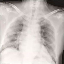

In [113]:
img

In [114]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 18ms/step


'NORMAL'

In [115]:
# testing 2
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/train/COVID19/COVID19(104).jpg',target_size =(64,64))

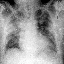

In [116]:
img

In [117]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 29ms/step


'COVID19'

In [118]:
# testing 3
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/train/NORMAL/NORMAL(1006).jpg',target_size =(64,64))

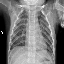

In [119]:
img

In [120]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 18ms/step


'NORMAL'

##**evaluating a cnn model**

In [121]:
model.evaluate(x_test)

52/52 [==============================] - 64s 1s/step - loss: 0.2510 - accuracy: 0.9055


[0.2510052025318146, 0.9055209755897522]

##**implementing transfer learning using vgg16**

In [26]:
trainpath = '/content/drive/MyDrive/covid19_prediction /Data/train'
testpath = '/content/drive/MyDrive/covid19_prediction /Data/test'


In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [28]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 16)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 16)


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [30]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [31]:
for layer in vgg.layers:
  print(layer)


In [35]:
len(vgg.layers)

19

In [36]:
for layer in vgg.layers:
  layer.trainable = False

In [37]:
x= Flatten()(vgg.output)

In [38]:
output = Dense(3, activation ='softmax')(x)

In [39]:
vgg16 = Model(vgg.input,output)


In [40]:
vgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [41]:
vgg16.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])


In [64]:
vgg16.fit(train,validation_data=test,epochs=3,steps_per_epoch=len(train),validation_steps =len(test))


Epoch 1/3
322/322 [==============================] - 160s 494ms/step - loss: 0.1243 - accuracy: 0.9553 - val_loss: 0.1396 - val_accuracy: 0.9495
Epoch 2/3
322/322 [==============================] - 152s 472ms/step - loss: 0.1187 - accuracy: 0.9582 - val_loss: 0.1470 - val_accuracy: 0.9472
Epoch 3/3
322/322 [==============================] - 151s 468ms/step - loss: 0.0843 - accuracy: 0.9677 - val_loss: 0.2427 - val_accuracy: 0.9262


In [129]:
# saving  the model
model.save('covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**testing vgg16 mode**


In [130]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [131]:
# testing 1
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/train/COVID19/COVID19(101).jpg',target_size =(64,64))
# test_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/covid19_prediction /Data/train/COVID19/COVID19(100).jpg', target_size=(224, 224))
# test_image = tf.keras.preprocessing.image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis=0)

# predictions = vgg.predict(test_image)
# print('Predicted class:', predictions)

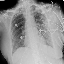

In [132]:
img

In [134]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 33ms/step


'COVID19'

In [74]:
#testing 2

In [147]:
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/test/COVID19/COVID19(473).jpg',target_size =(64,64))

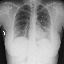

In [148]:
img

In [149]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 18ms/step


'COVID19'

In [144]:
#testing3
img = image.load_img('/content/drive/MyDrive/covid19_prediction /Data/test/PNEUMONIA/PNEUMONIA(3434).jpg',target_size =(64,64,))

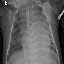

In [145]:
img

In [146]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['COVID19','NORMAL','PNEUMONIA']
op[pred]

1/1 [==============================] - 0s 26ms/step


'PNEUMONIA'